In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nus = [0., .5, 1.]
ang_corrs = [0., .5, .6, .7, .8, .9, 1.]
ang_corr_experiments = [
    'results_nu_0.json',
    'results_nu_0.5.json',
    'results_nu_1.json',
]
nu_experiments = [
    'results_g_0.json',
    'results_g_0.5.json',
    'results_g_0.6.json',
    'results_g_0.7.json',
    'results_g_0.8.json',
    'results_g_0.9.json',
    'results_g_1.json',
]

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', size=36, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

In [4]:
fontsize = 36
legendsize = 30
fmts = ['-', '--', '-']
lws = [4, 6, 4]

In [5]:
save = False

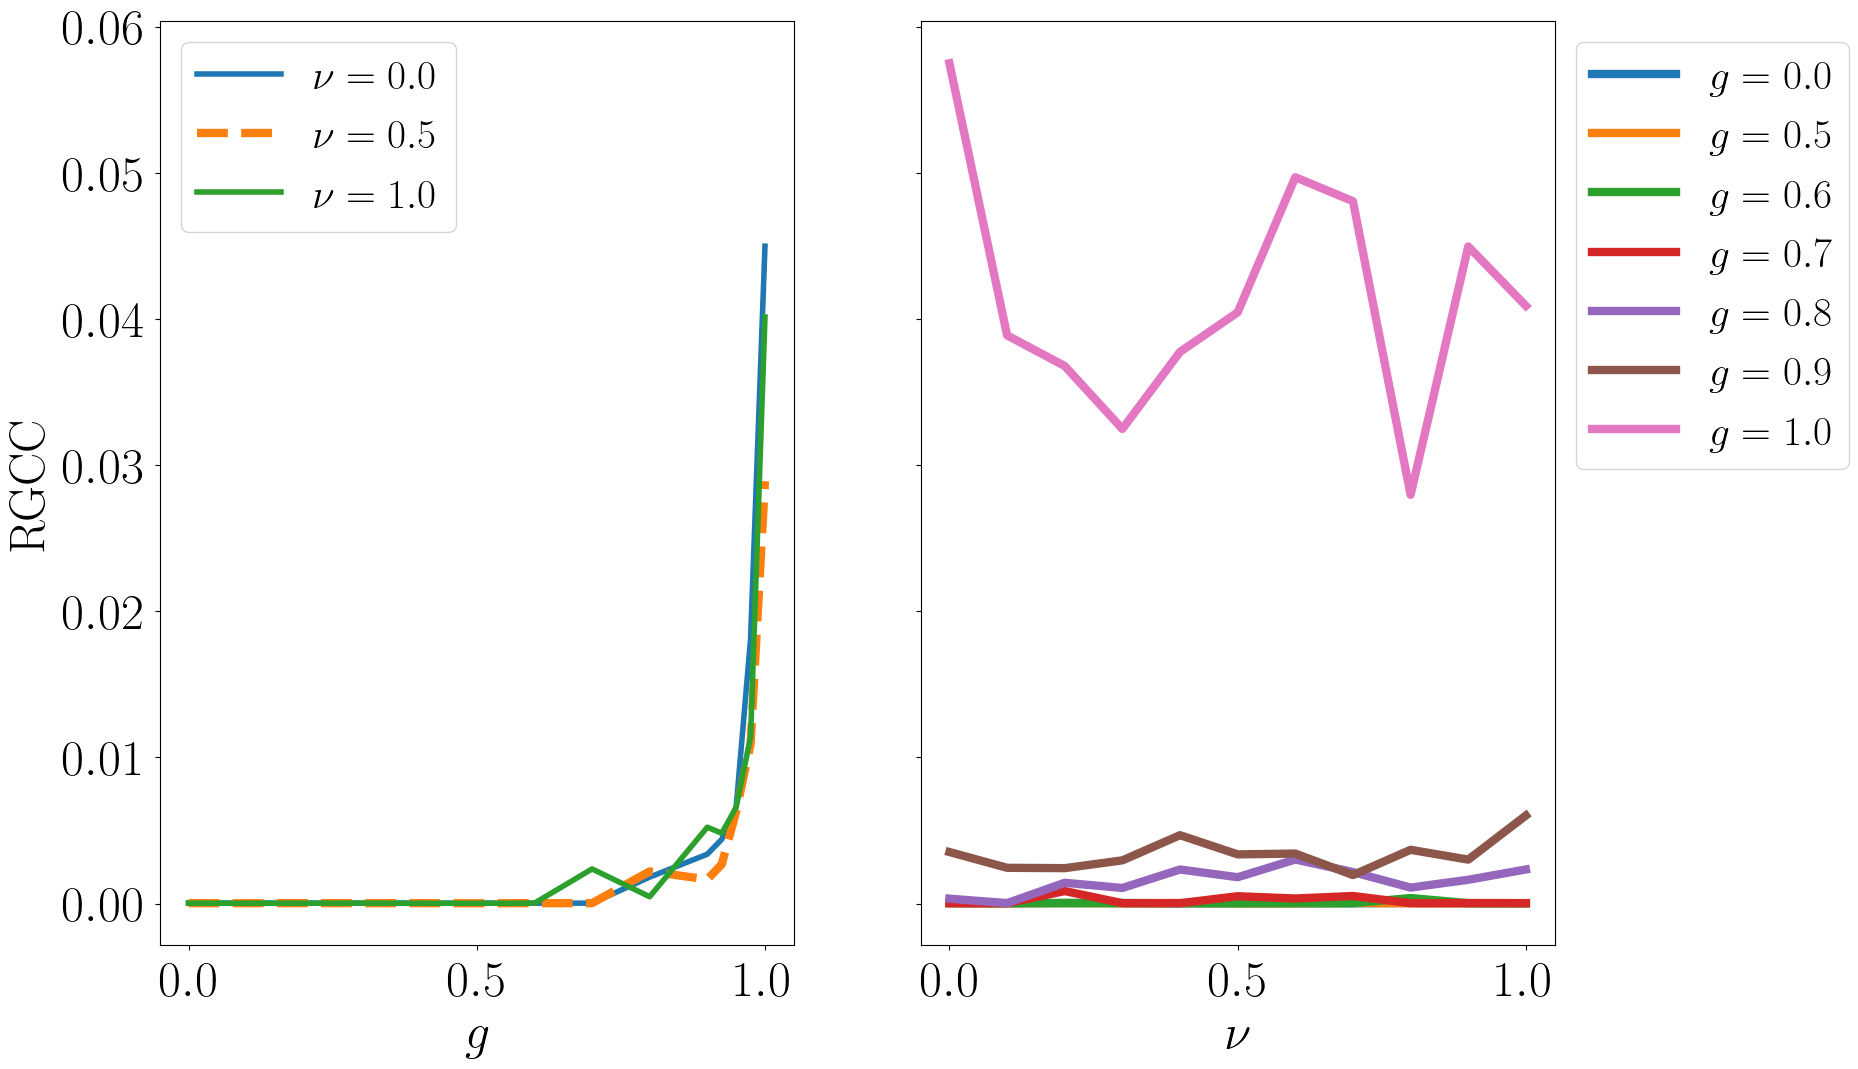

In [7]:
plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18, 12))

plt.subplot(121)
for nu, experiment, fmt, lw in zip(nus, ang_corr_experiments, fmts, lws):
    with open(experiment, 'r') as f:
        results = json.load(f)
    N = results['N']
    gvec = results['gvec']
    nruns = results['nruns']
    results = results['results']
    
    rgcc = []
    for res in results:
        rgcc.append(np.mean([run['rgcc_size'] for run in res['runs']]) / N)

    plt.plot(gvec[:len(rgcc)], rgcc, fmt, lw=lw, label=fr'$\nu = {nu}$')
plt.legend(fontsize=legendsize, loc='upper left')
plt.xlabel(fr'$g$', fontdict={'size': fontsize})
plt.ylabel(fr'$\mathrm{{RGCC}}$', fontdict={'size': fontsize})
# plt.ylim(0, .3)

plt.subplot(122)
for g, experiment in zip(ang_corrs, nu_experiments):
    with open(experiment, 'r') as f:
        results = json.load(f)
    N = results['N']
    nurange = np.linspace(*results['nurange'])
    nruns = results['nruns']
    results = results['results']
    
    rgcc = []
    for res in results:
        rgcc.append(np.mean([run['rgcc_size'] for run in res['runs']]) / N)

    plt.plot(nurange[:len(rgcc)], rgcc, '-', lw=6, label=fr'${g = }$')
plt.legend(fontsize=legendsize, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel(fr'$\nu$', fontdict={'size': fontsize})

if save:
    plt.savefig('rgcc_correlation_percolation.pdf')

50000